In [25]:
# Reading the first few lines of each uploaded file to understand the structure of the data.
file_paths = ['/home/mkato/hdd_data/data/1-withAADR/1-1-pca/jomon_aadr_asia.evec.txt.evec', '/home/mkato/hdd_data/data/1-withAADR/1-0-merged_eigen/asia_poplist.txt']

# Reading first few lines from PCA results file
with open(file_paths[0], 'r') as f:
    pca_preview = [f.readline().strip() for _ in range(5)]

# Reading first few lines from population list file
with open(file_paths[1], 'r') as f:
    poplist_preview = [f.readline().strip() for _ in range(5)]

pca_preview, poplist_preview

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reading PCA results into a DataFrame
pca_df = pd.read_csv(file_paths[0], delim_whitespace=True, comment='#', header=None, names=['Sample', 'PC1', 'PC2', 'PC3', 'PC4', 'Population'])

# Reading population list into a list
with open(file_paths[1], 'r') as f:
    pop_list = [line.strip() for line in f.readlines()]

# Filtering PCA DataFrame based on population list
pca_filtered_df = pca_df[pca_df['Population'].isin(pop_list)]

# Consolidate populations based on given strings
consolidate_dict = {
    'China': 'China',
    'Korea': 'Korea',
    'Mongolia': 'Mongolia',
    'Nepal': 'Nepal',
    'Taiwan': 'Taiwan',
    'Thai': 'Thai',
    'DevilsCave': 'DevilsCave',
    'Vietnam': 'Vietnam',
    'Malaysia': 'Malaysia',
    'Laos': 'Laos',
    'Indonesia': 'Indonesia',
    'Nagabaka': 'Nagabaka',
    'JPT': 'JPT',
    'CHB': 'CHB',
    'KHV': 'KHV',
    'CDX': 'CDX',
    'CHS': 'CHS',
    'Sanganji': 'Sanganji',
    'Control': 'Control'
}

# Apply the consolidation
for key, value in consolidate_dict.items():
    pca_filtered_df.loc[pca_filtered_df['Population'].str.contains(key), 'Population'] = value

# For the 'Control' population, use sample names for coloring
control_samples = pca_filtered_df[pca_filtered_df['Population'] == 'Control']['Sample'].unique()
control_color_map = {sample: f'{sample.split(":")[0]}' for sample in control_samples}
pca_filtered_df.loc[pca_filtered_df['Population'] == 'Control', 'Population'] = pca_filtered_df['Sample'].map(control_color_map)

# Check the first few rows of the filtered and modified DataFrame
pca_filtered_df.head()


,Sample,PC1,PC2,PC3,PC4,Population
1,DO:DO,0.1265,-0.1550,-0.0207,-0.0276,DO
2,FM020:FM020,0.0933,-0.1120,-0.0176,-0.0290,FM020
3,Jomon:Jomon,0.1404,-0.1741,-0.0221,-0.0381,Jomon
4,T5:T5,0.1299,-0.1587,-0.0255,-0.0273,T5
5,Ne30_genotyping_noUDG,0.0088,0.0051,-0.0353,0.0016,China


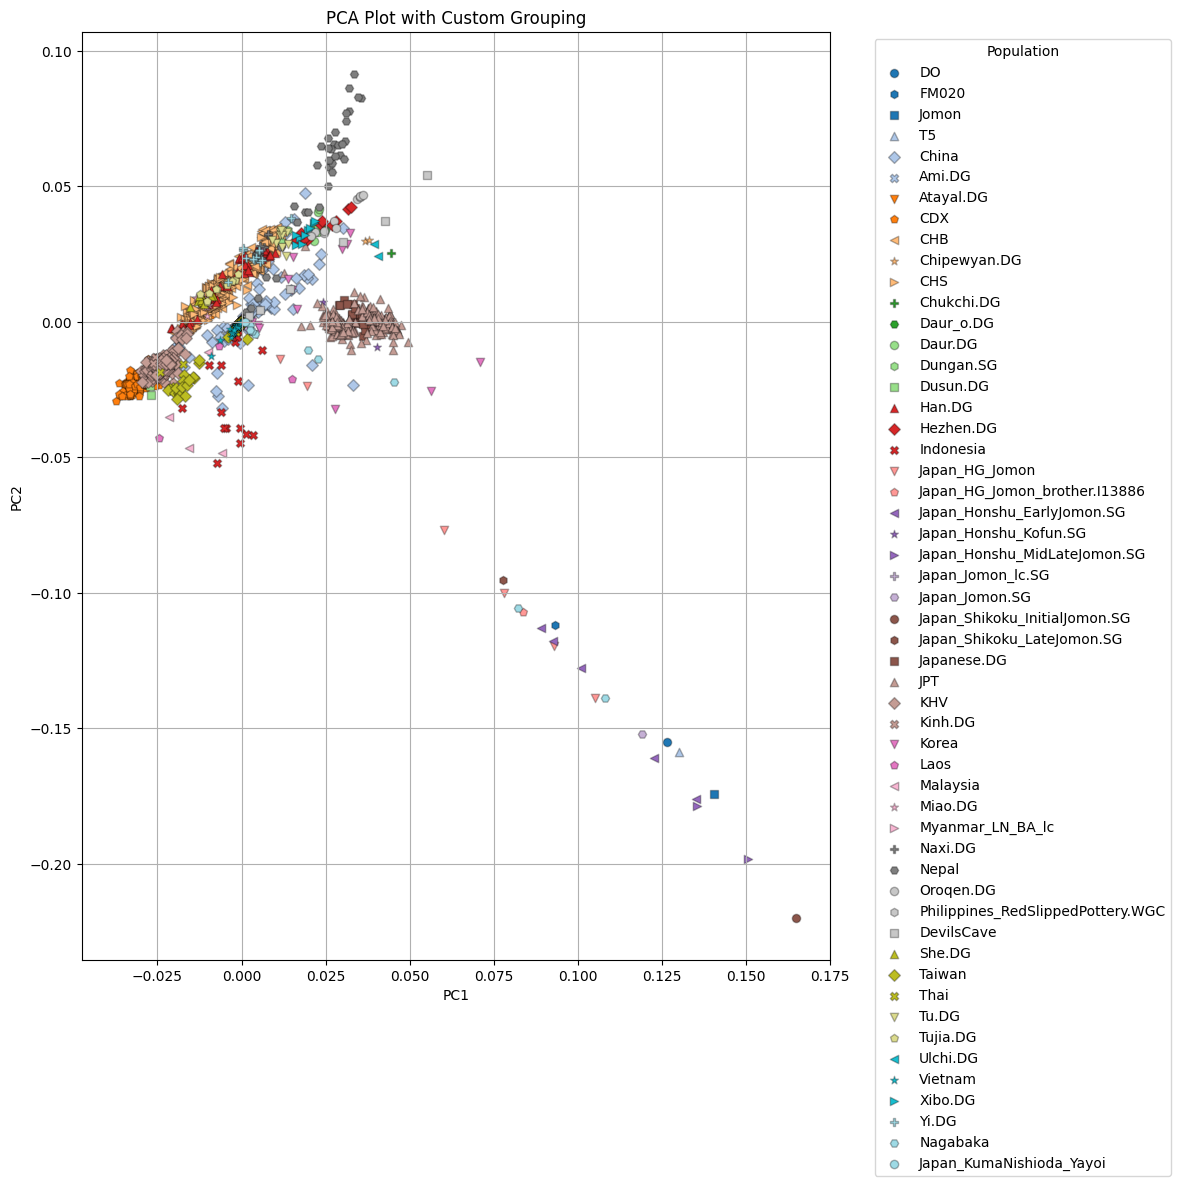

In [37]:
# Unique populations for setting colors and markers
unique_pops = pca_filtered_df['Population'].unique()

# Generate color map
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_pops)))
color_map = {pop: color for pop, color in zip(unique_pops, colors)}

# Marker styles
markers = ['o', 'h' ,'s','^', 'D', 'X','v','p', '<','*', '>', 'P', 'H',]
marker_map = {pop: marker for pop, marker in zip(unique_pops, markers * (len(unique_pops) // len(markers) + 1))}

# Plotting
plt.figure(figsize=(12, 12))

for pop in unique_pops:
    subset = pca_filtered_df[pca_filtered_df['Population'] == pop]
    plt.scatter(subset['PC1'], subset['PC2'],edgecolor=(0,0,0,0.3), c=[color_map[pop]], label=pop, marker=marker_map[pop])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Population', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('PCA Plot with Custom Grouping')
plt.grid(True)
plt.tight_layout()
plt.show()


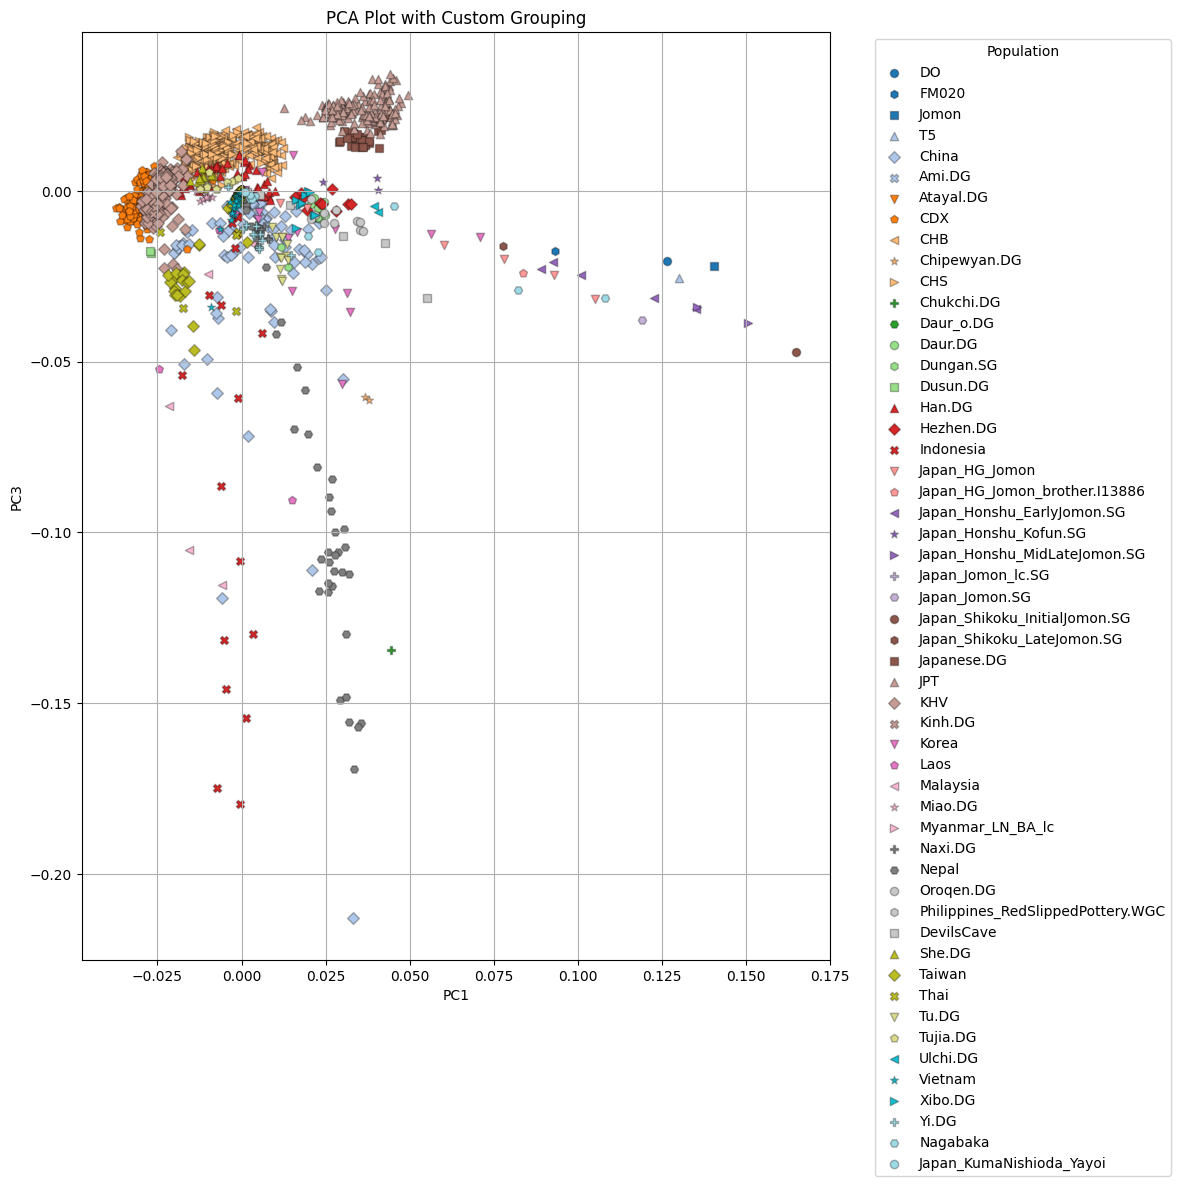

In [38]:
# Plotting
plt.figure(figsize=(12, 12))

for pop in unique_pops:
    subset = pca_filtered_df[pca_filtered_df['Population'] == pop]
    plt.scatter(subset['PC1'], subset['PC3'], edgecolor=(0,0,0,0.3),c=[color_map[pop]], label=pop, marker=marker_map[pop])

plt.xlabel('PC1')
plt.ylabel('PC3')
plt.legend(title='Population', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('PCA Plot with Custom Grouping')
plt.grid(True)
plt.tight_layout()
plt.show()
